In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import signal

def get_spectrogram(filename, log=False):
    # Load the audio file
    rate, data = wavfile.read(filename)

    # Compute the spectrogram
    f, t, Sxx = signal.spectrogram(data, rate, nperseg=1024)
    if log:
        Sxx = np.log10(Sxx + 1e-9)

    return f, t, Sxx

def plot_spectrogram(f, t, Sxx, ax=None):
    if ax is not None:
        ax.pcolormesh(t, f, Sxx)
        ax.set_ylabel('Frequency [Hz]')
        ax.set_xlabel('Time [s]')
    else:
        plt.pcolormesh(t, f, Sxx)
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [s]')
        plt.show()

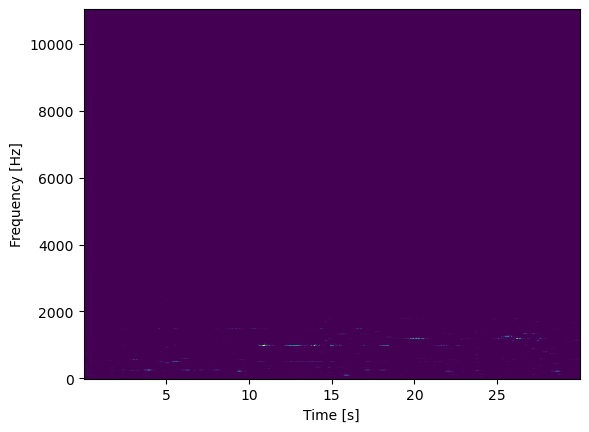

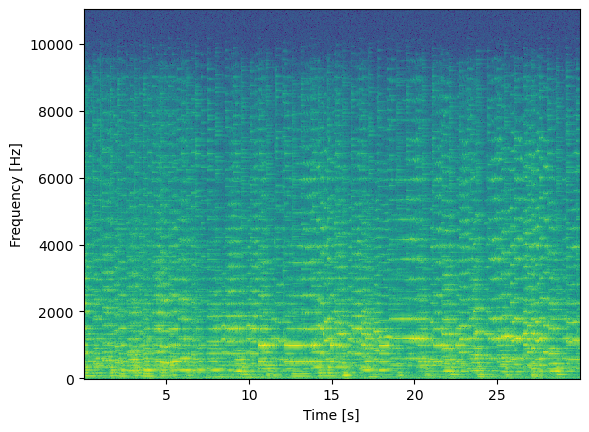

In [61]:
f, t, Sxx = get_spectrogram("../res/genres_original/classical/classical.00001.wav")
plot_spectrogram(f, t, Sxx) # Non-log spectrogram
plot_spectrogram(f, t, np.log10(Sxx + 1e-9)) # Vs log spectrogram

In [3]:
# Average spectrogram, average the logs or log the average ?
import glob
import os

n_genres = 10
n_files_per_genre = 100

data_dir = "../res/genres_original/"

In [4]:
from tqdm.notebook import tqdm

In [13]:
# Average the logs
average_log_spectrogram = np.zeros((Sxx.shape[0], Sxx.shape[1], n_genres), dtype=np.float64)

errors = []

for k, genre in enumerate(os.listdir(data_dir)):
    audio_files = [os.path.join(data_dir, genre, file) for file in os.listdir(data_dir + genre)]
    for audio_file in tqdm(audio_files):
        try:
            f, t, log_Sxx = get_spectrogram(audio_file, log=True)
            average_log_spectrogram[:,:,k] += log_Sxx
        except Exception as err:
            errors.append((audio_file, type(err)))

average_log_spectrogram /= n_files_per_genre

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [17]:
errors

[('../res/genres_original/classical\\classical.00042.wav', ValueError),
 ('../res/genres_original/classical\\classical.00045.wav', ValueError),
 ('../res/genres_original/classical\\classical.00048.wav', ValueError),
 ('../res/genres_original/classical\\classical.00051.wav', ValueError),
 ('../res/genres_original/classical\\classical.00053.wav', ValueError),
 ('../res/genres_original/classical\\classical.00054.wav', ValueError),
 ('../res/genres_original/classical\\classical.00056.wav', ValueError),
 ('../res/genres_original/country\\country.00000.wav', ValueError),
 ('../res/genres_original/country\\country.00002.wav', ValueError),
 ('../res/genres_original/country\\country.00005.wav', ValueError),
 ('../res/genres_original/country\\country.00006.wav', ValueError),
 ('../res/genres_original/country\\country.00007.wav', ValueError),
 ('../res/genres_original/country\\country.00008.wav', ValueError),
 ('../res/genres_original/country\\country.00009.wav', ValueError),
 ('../res/genres_ori

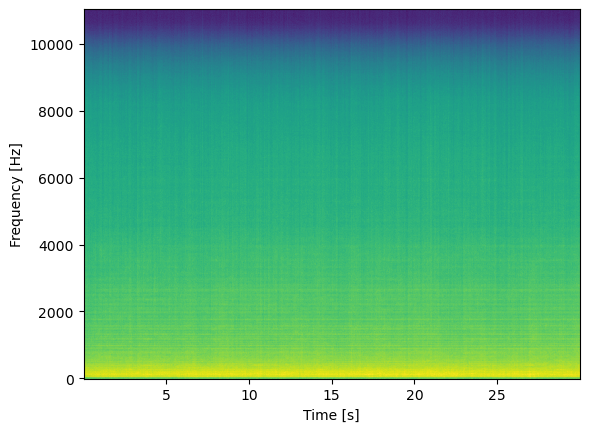

In [30]:
plot_spectrogram(f, t, average_log_spectrogram[:,:,9])

In [31]:
# Log the average
log_average_spectrogram = np.zeros((Sxx.shape[0], Sxx.shape[1], n_genres), dtype=np.float64)

for k, genre in enumerate(os.listdir(data_dir)):
    audio_files = os.listdir(data_dir + genre)
    for audio_file in tqdm(audio_files):
        try:
            f, t, Sxx = get_spectrogram(audio_file, log=False)
            log_average_spectrogram[:,:,k] += Sxx
        except Exception as err:
            errors.append((audio_file, type(err)))

log_average_spectrogram /= n_files_per_genre
log_average_spectrogram = np.log10(average_log_spectrogram + 1e-9)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\Achille\AppData\Local\Temp\ipykernel_5028\825697174.py:14: RuntimeWarning: invalid value encountered in log10
  log_average_spectrogram = np.log10(average_log_spectrogram + 1e-9)


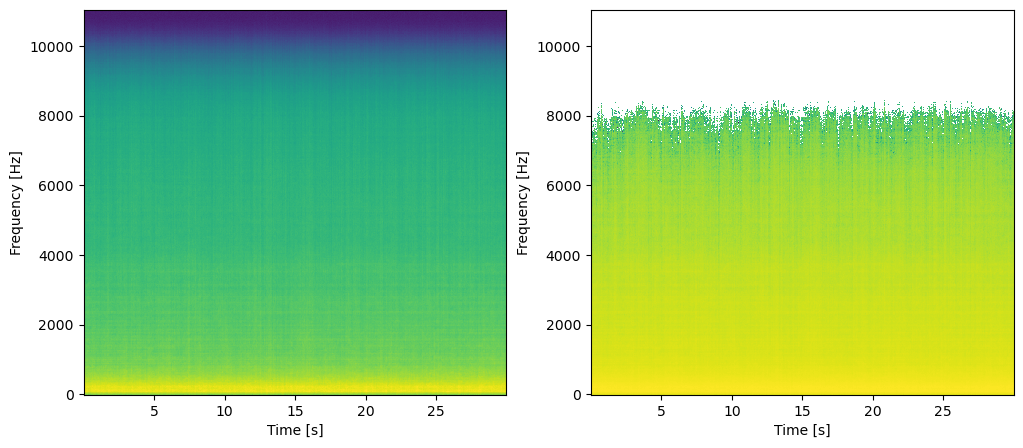

In [42]:
# Compare log-average and average-log
genre = "blues"
k = os.listdir(data_dir).index(genre)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plot_spectrogram(f, t, average_log_spectrogram[:,:,k], ax=axs[0])
plot_spectrogram(f, t, log_average_spectrogram[:,:,k], ax=axs[1])

plt.show()

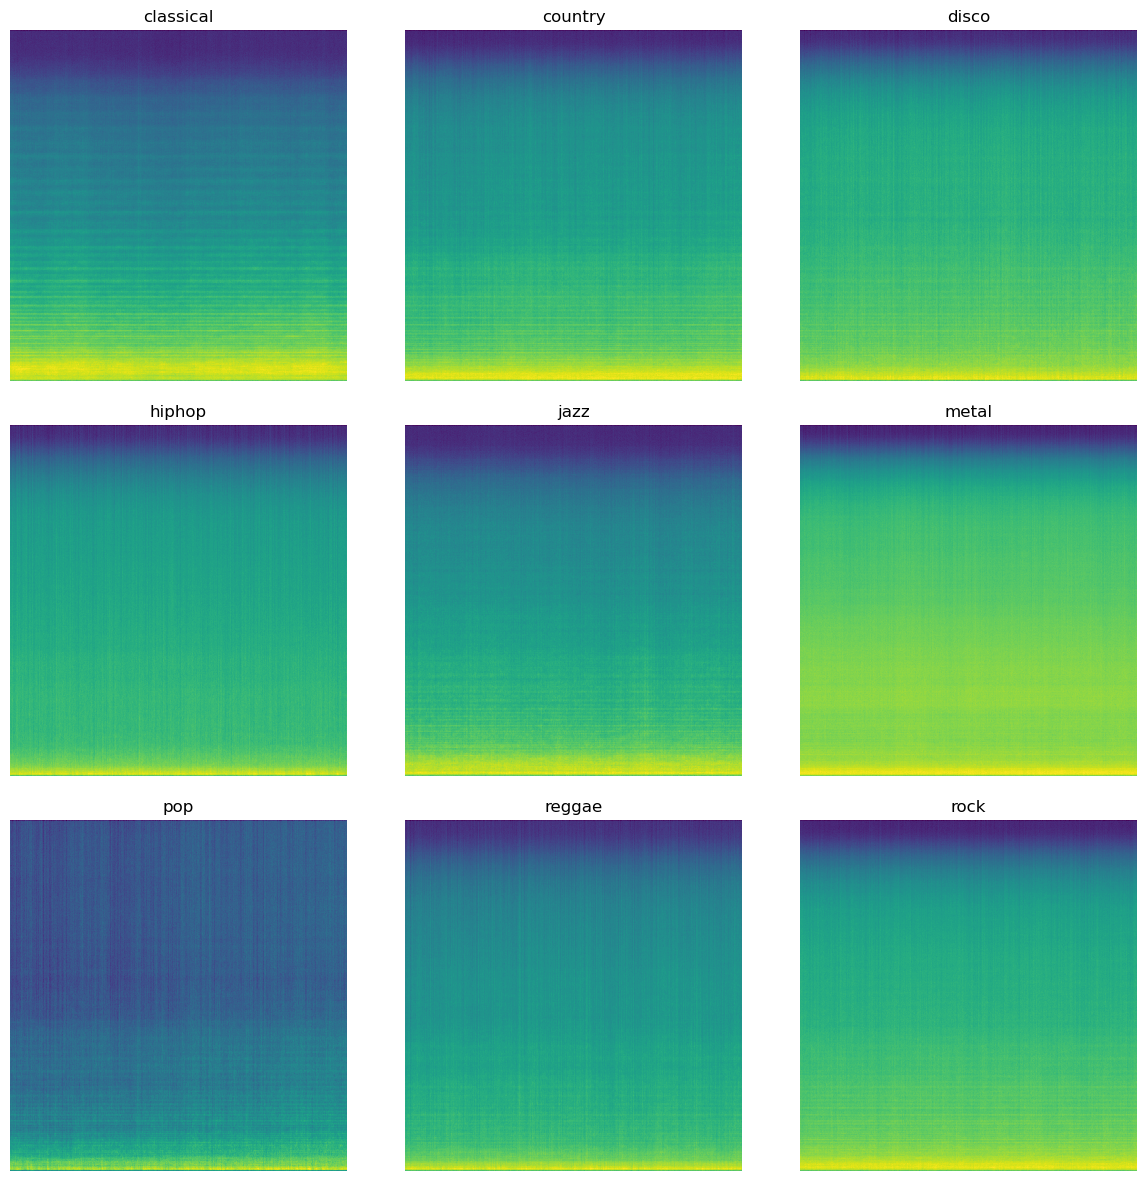

In [52]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()
fig.tight_layout()

for j, k in enumerate(range(1, 10)):
    plot_spectrogram(f, t, average_log_spectrogram[:,:,k], ax=axs[j])
    axs[j].set_title(os.listdir(data_dir)[k])
    axs[j].axis(False)

I suppose the horizontal patterns in "classical" spectrogram represent the several harmonies covered by instruments. Since there are fewer instruments in classical music and/or fewer audio channels / effects etc, the differents instruments stand out more, and they can more easily be found from the spectrogram (different instruments spread over different number of harmonies in different intensity ?)

You notice these horizontal pattersn in the more "acoustic" genres for instance classical, country, jazz.
Whereas in genres such as hip-hop and metal that are less acoustic, you don' tnotice these patterns as much.

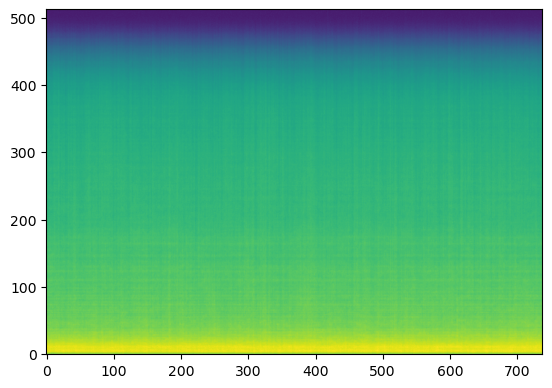

In [55]:
plt.imshow(average_log_spectrogram[:,:,0], origin='lower')